![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Importa el dataset BBDD_Hospitalización.csv a df0
df0 = pd.read_csv("data/BBDD_Hospitalización.csv", sep=";")


Se observan multiples columnas con pocos valores nulos.
4 columnas float64 y 15 columnas object.

In [15]:
# utilizar el método nunique() en pandas para ver cuántas variables distintas hay en cada columna de un DataFrame. 
# Este método cuenta el número de valores únicos en una columna.
print(df0.nunique()) 
df0.head()

EDAD                                                                          45
DIABETES                                                                       2
HOSPITALIZACIÓN ULTIMO MES                                                     2
PSA                                                                          146
BIOPSIAS PREVIAS                                                               2
VOLUMEN PROSTATICO                                                             2
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                        5
NUMERO DE MUESTRAS TOMADAS                                                    12
CUP                                                                            2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                              4
BIOPSIA                                                                       11
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA      6
FIEBRE                      

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


Se deben pasar los atributos categoricos a numericos y normalizar el formato de la columna 4 (PSA) Y Nro dias post Biopsia.

In [16]:
# Renombra algunas columnas
df1 = df0
df1.rename(columns={'HOSPITALIZACIÓN ULTIMO MES': 'Hosp.U/Mes'}, inplace=True)
df1.rename(columns={'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'Antibiotico en profilaxis'}, inplace=True)
df1.rename(columns={'NUMERO DE MUESTRAS TOMADAS': 'Cant Muestras'}, inplace=True)
df1.rename(columns={'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'ECPO'}, inplace=True)
df1.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'Dias Post Biopsia Infecc'}, inplace=True)
encabezados = list(df1.columns)
print(encabezados)
df1.head()

['EDAD', 'DIABETES', 'Hosp.U/Mes', 'PSA', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'Antibiotico en profilaxis', 'Cant Muestras', 'CUP', 'ECPO', 'BIOPSIA', 'Dias Post Biopsia Infecc', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']


,EDAD,DIABETES,Hosp.U/Mes,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,Antibiotico en profilaxis,Cant Muestras,CUP,ECPO,BIOPSIA,Dias Post Biopsia Infecc,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [17]:

# Reemplaza la coma por el punto en la columna 'PSA'
df1['PSA'] = df1['PSA'].str.replace(',', '.')
# Convierte la columna 'PSA' a un tipo numérico
df1['PSA'] = pd.to_numeric(df1['PSA'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EDAD                       568 non-null    float64
 1   DIABETES                   568 non-null    object 
 2   Hosp.U/Mes                 568 non-null    object 
 3   PSA                        564 non-null    float64
 4   BIOPSIAS PREVIAS           566 non-null    object 
 5   VOLUMEN PROSTATICO         567 non-null    object 
 6   Antibiotico en profilaxis  568 non-null    object 
 7   Cant Muestras              568 non-null    float64
 8   CUP                        567 non-null    object 
 9   ECPO                       566 non-null    object 
 10  BIOPSIA                    568 non-null    object 
 11  Dias Post Biopsia Infecc   568 non-null    object 
 12  FIEBRE                     568 non-null    object 
 13  ITU                        568 non-null    object 

In [18]:
# Consulta los valores de Dias Post Biopsia Infecc 
df1['Dias Post Biopsia Infecc'].dropna(inplace=True)
df1['Dias Post Biopsia Infecc'].unique()


array(['1', '2', '3', '5', '9', 'NO', nan], dtype=object)

La columna 'Dias Post Biopsia Infecc' tiene valores nan que no pueden eliinarse con .dropna ni con .isnan debido al formato object.
Eliminar los valores con nan, convertir los 'NO' en 0 y pasar a formato numerico.

In [19]:
df1.dropna(inplace=True)
df1['Dias Post Biopsia Infecc'].unique()

array(['1', '2', '3', '5', '9', 'NO'], dtype=object)

In [20]:
df1['Dias Post Biopsia Infecc'] = df1['Dias Post Biopsia Infecc'].str.replace('NO', '0')
df1['Dias Post Biopsia Infecc'] = pd.to_numeric(df1['Dias Post Biopsia Infecc'])
df1['Dias Post Biopsia Infecc'].unique()

array([1, 2, 3, 5, 9, 0])

In [21]:
# Transforma en un nuevo df2 las variables categoricas a numericas descartando: 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'
# Primero copia las variables numericas y luego copia las categoricas transformadas a numericas desde df1 a df2
df2 = df1[['EDAD','PSA','Cant Muestras','Dias Post Biopsia Infecc']]
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df2[['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']] = le.fit_transform(df1[['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']])
df2.head()

,EDAD,PSA,Cant Muestras,Dias Post Biopsia Infecc
0,53.0,4.0,12.0,1
1,56.0,7.7,12.0,1
2,57.0,29.0,24.0,1
3,56.0,7.0,12.0,1
4,55.0,29.0,24.0,1


<Axes: >

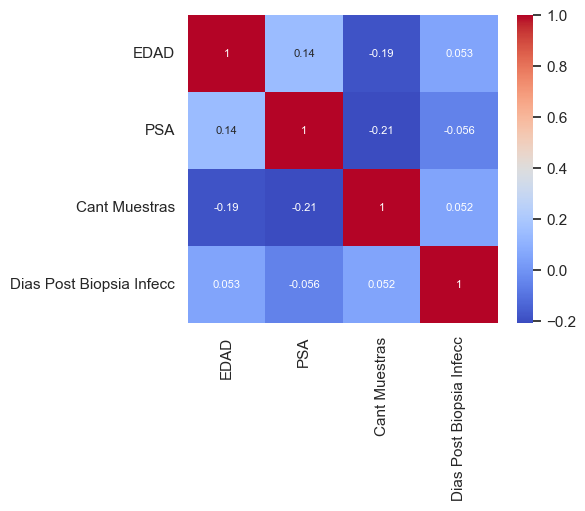

In [22]:
# Calcula la correlacion y grafica un Heatmap.
corr_matrix_dfC = df2.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix_dfC, cmap='coolwarm', annot=True, annot_kws={'size': 8})

No se observan columnas redundantes entre columnas numericas.

In [23]:
# Transforma un conjunto de columnas categoricas en numericas y las copia en un nuevo df2.
dfA = pd.DataFrame()
from sklearn import preprocessing
cols_to_transform = ['DIABETES', 'Hosp.U/Mes', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'Antibiotico en profilaxis', 'CUP', 'ECPO', 'BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']
df_cols_to_transform = df1[cols_to_transform]
le = preprocessing.LabelEncoder()

for col in df_cols_to_transform.columns:
    df_cols_to_transform[col] = le.fit_transform(df_cols_to_transform[col])

# Reemplazar las columnas originales en el DataFrame
dfA[cols_to_transform] = df_cols_to_transform
dfA.head()

/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_5782/464463416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols_to_transform[col] = le.fit_transform(df_cols_to_transform[col])
/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_5782/464463416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols_to_transform[col] = le.fit_transform(df_cols_to_transform[col])
/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_5782/464463416.py:9: SettingWithCopyWarning: 
A value is 

,DIABETES,Hosp.U/Mes,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,Antibiotico en profilaxis,CUP,ECPO,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,0,0,0,1,1,0,0,9,1,0,2,1,2,1
1,0,0,0,1,1,0,0,9,1,0,2,1,2,1
2,0,0,1,1,1,0,0,9,1,0,0,0,0,1
3,0,0,0,1,1,0,0,9,1,0,2,1,2,1
4,0,0,1,1,1,0,0,9,1,0,0,0,2,1


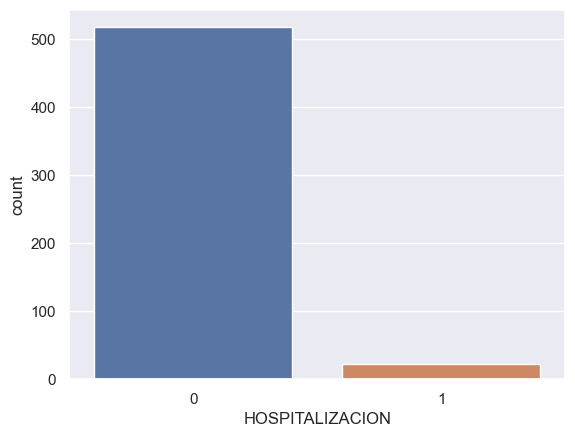

In [24]:
# Observamos cuántos casos hay de hospitalizacion y cuántos no

sns.countplot(x = 'HOSPITALIZACION', data = dfA)
plt.show()

El dataset esta desbalanceado con mas de 500 casos de no hospitalizacion y unos pocos de si hospitalizacion.
Es un caso de pocos datos para casos positivos, que es justamente lo que nos interesa predecir.
Deberiamos hacer un sobremuestreo, es decir, incorporaremos más datos de la clase minoritaria. En caso que no podamos obtenerlos de alguna fuente externa, se soluciona simplemente copiando registros que corresponden a esa categoría en nuestro propio dataset.

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [ ]:
#  Ya se eliminaron con dropna

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

Text(0, 0.5, 'Edad')

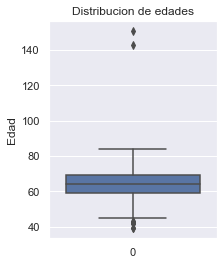

In [86]:
# Detecta Outliers de edad con boxplot
plt.figure(figsize = (3,4))
sns.boxplot(data=df2['EDAD'])
plt.title('Distribucion de edades', fontsize = 12)
# plt.xlabel('Cars')
plt.ylabel('Edad')

Se observan un par de outliers de edad, que deben ser errores de tipeo, pueden eliminarse o corregirse restando 100.

Text(0, 0.5, 'PSA')

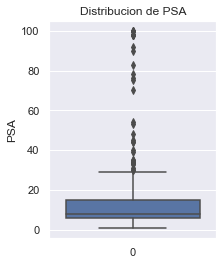

In [87]:
# Detecta Outliers de PSA con boxplot
plt.figure(figsize = (3,4))
sns.boxplot(data=df2['PSA'])
plt.title('Distribucion de PSA', fontsize = 12)
plt.ylabel('PSA')

La gran cantidad de Outliers superiores de PSA quizas se relacione con la desproporcion entre los casos de Hospitalizacion.

Text(0, 0.5, 'Cant Muestras')

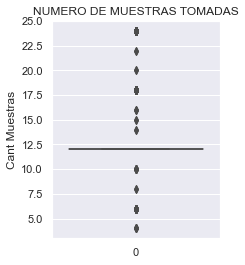

In [89]:
# Detecta Outliers de PSA con boxplot
plt.figure(figsize = (3,4))
sns.boxplot(data=df2['Cant Muestras'])
plt.title('NUMERO DE MUESTRAS TOMADAS', fontsize = 12)
plt.ylabel('Cant Muestras')


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Text(0, 0.5, 'Edad')

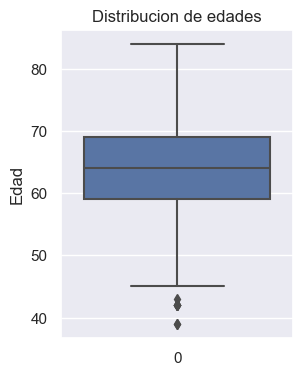

In [25]:
# Eliminamos los outliers de edades dado que son 2 casos de NO hospitalizacion, y hay un sobremuestreo.
df3 = df2.drop(df2[df2['EDAD'] > 100].index)
plt.figure(figsize = (3,4))
sns.boxplot(data=df3['EDAD'])
plt.title('Distribucion de edades', fontsize = 12)
# plt.xlabel('Cars')
plt.ylabel('Edad')


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [92]:
dfA.describe()

,DIABETES,Hosp.U/Mes,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,Antibiotico en profilaxis,CUP,ECPO,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.116451,0.009242,0.096118,0.719039,1.192237,0.007394,0.049908,6.909427,0.066543,0.011091,1.996303,0.992606,2.003697,0.042514
std,0.321062,0.095779,0.295026,0.449885,0.936905,0.085748,0.303231,2.795685,0.249460,0.104823,0.160973,0.121491,0.172093,0.201945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,10.000000,1.000000,1.000000,3.000000,2.000000,4.000000,1.000000


In [95]:
dfA.nunique()

DIABETES                      2
Hosp.U/Mes                    2
BIOPSIAS PREVIAS              2
VOLUMEN PROSTATICO            2
Antibiotico en profilaxis     5
CUP                           2
ECPO                          4
BIOPSIA                      11
FIEBRE                        2
ITU                           2
TIPO DE CULTIVO               4
AGENTE AISLADO                3
PATRON DE RESISTENCIA         5
HOSPITALIZACION               2
dtype: int64

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [ ]:
# Probemos normalizar a ver que cambia


Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [33]:
# Vamos a hacer un Oversampling para balancear el dataset, copiando los casos positivos 20 veces
# Separar las filas que tienen un valor de 1 en la columna 'HOSPITALIZACION':
df_hospitalizados = df_num[df_num['HOSPITALIZACION'] == 1]
df_hospitalizados.head()

,EDAD,PSA,Cant Muestras,Dias Post Biopsia Infecc,DIABETES,Hosp.U/Mes,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,Antibiotico en profilaxis,CUP,ECPO,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,4.0,12.0,1,0,0,0,1,1,0,0,9,1,0,2,1,2,1
1,56.0,7.7,12.0,1,0,0,0,1,1,0,0,9,1,0,2,1,2,1
2,57.0,29.0,24.0,1,0,0,1,1,1,0,0,9,1,0,0,0,0,1
3,56.0,7.0,12.0,1,0,0,0,1,1,0,0,9,1,0,2,1,2,1
4,55.0,29.0,24.0,1,0,0,1,1,1,0,0,9,1,0,0,0,2,1


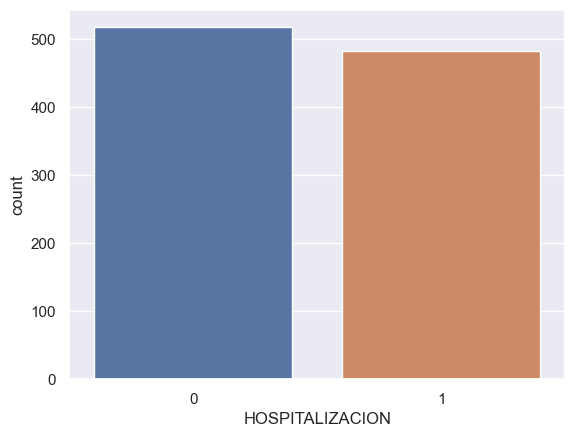

In [34]:
# Multiplicar dichas filas 20 veces:
df_hospitalizados_oversampled = pd.concat([df_hospitalizados] * 20, ignore_index=True)
# ignore_index=True es necesario para que los índices de las filas sobremuestreadas no coincidan con los índices de las filas originales.
# Concatenar el dataframe sobremuestreado con el dataframe original
df_oversampled = pd.concat([df_num, df_hospitalizados_oversampled])
# Observamos cuántos casos hay de hospitalizacion y cuántos no
sns.countplot(x = 'HOSPITALIZACION', data = df_oversampled)
plt.show()

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [96]:
# Guardar cambios en un archivo CSV
dfA.to_csv('categorical_to_numerical.csv', index=False)

In [26]:
df2.to_csv('only_numerical.csv', index=False)

In [27]:
# Unir dataframes 
df_num = pd.merge(df2, dfA, left_index=True, right_index=True)
df_num.head()

,EDAD,PSA,Cant Muestras,Dias Post Biopsia Infecc,DIABETES,Hosp.U/Mes,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,Antibiotico en profilaxis,CUP,ECPO,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,4.0,12.0,1,0,0,0,1,1,0,0,9,1,0,2,1,2,1
1,56.0,7.7,12.0,1,0,0,0,1,1,0,0,9,1,0,2,1,2,1
2,57.0,29.0,24.0,1,0,0,1,1,1,0,0,9,1,0,0,0,0,1
3,56.0,7.0,12.0,1,0,0,0,1,1,0,0,9,1,0,2,1,2,1
4,55.0,29.0,24.0,1,0,0,1,1,1,0,0,9,1,0,0,0,2,1


In [28]:
df_num.to_csv('all_numerical.csv', index=False)

In [35]:
df_oversampled.to_csv('oversampled.csv', index=False)

1- Edad del paciente tratar 2 outliers por media
2- Diabetes, binarizar a numerico
3- Nro muestras biopsia
4- Usar value counts para algunas categoricas.
5- Verificar que hay mismos medicamentos con distintos nombres 
6- Conviene hacer Boxplot de todos los atributos para ver outliers.